## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [2]:
import os
from tensorflow import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from tensorflow.keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x) 
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 64, 256, 1024]
MOMENTUM = 0.95


In [8]:
results={}
for batchsize in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batchsize, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "batchsize-%s" % str(batchsize)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
batch_normalization_v2 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v2_2 (Ba (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 47s 950us/sample - loss: 1.7327 - accuracy: 0.3811 - val_loss: 1.5006 - val_accuracy: 0.4664
Epoch 2/50
50000/50000 [==============================] - 47s 931us/sample - loss: 1.5351 - accuracy: 0.4551 - val_loss: 1.4344 - val_accuracy: 0.4882
Epoch 3/50
50000/50000 [==============================] - 47s 944us/sample - loss: 1.4530 - accuracy: 0.4823 - val_loss: 1.3814 - val_accuracy: 0.5066
Epoch 4/50
50000/50000 [==============================] - 47s 940us/sample - loss: 1.3934 - accuracy: 0.5034 - val_loss: 1.3463 - val_accuracy: 0.5205
Epoch 5/50
50000/50000 [==============================] - 47s 936us/sample - loss: 1.3430 - accuracy: 0.5240 - val_loss: 1.3376 - val_accuracy: 0.5250
Epoch 6/50
50000/50000 [==============================] - 47s 936us/sample - loss: 1.3019 - accuracy: 0.5385 - val_loss: 1.3131 - val_accuracy: 0.5416
Epoch 7/50
50000/50000 [====================

Epoch 1/50
50000/50000 [==============================] - 20s 409us/sample - loss: 1.6873 - accuracy: 0.4040 - val_loss: 1.4917 - val_accuracy: 0.4729
Epoch 2/50
50000/50000 [==============================] - 18s 364us/sample - loss: 1.4148 - accuracy: 0.4993 - val_loss: 1.4037 - val_accuracy: 0.4982
Epoch 3/50
50000/50000 [==============================] - 18s 361us/sample - loss: 1.2963 - accuracy: 0.5409 - val_loss: 1.3724 - val_accuracy: 0.5100
Epoch 4/50
50000/50000 [==============================] - 18s 365us/sample - loss: 1.1991 - accuracy: 0.5778 - val_loss: 1.3521 - val_accuracy: 0.5165
Epoch 5/50
50000/50000 [==============================] - 18s 364us/sample - loss: 1.1277 - accuracy: 0.6059 - val_loss: 1.3507 - val_accuracy: 0.5232
Epoch 6/50
50000/50000 [==============================] - 18s 362us/sample - loss: 1.0562 - accuracy: 0.6294 - val_loss: 1.3309 - val_accuracy: 0.5352
Epoch 7/50
50000/50000 [==============================] - 18s 362us/sample - loss: 0.9956 - ac

Epoch 1/50
50000/50000 [==============================] - 13s 265us/sample - loss: 1.8358 - accuracy: 0.3548 - val_loss: 1.7905 - val_accuracy: 0.3623
Epoch 2/50
50000/50000 [==============================] - 13s 251us/sample - loss: 1.5057 - accuracy: 0.4694 - val_loss: 1.5297 - val_accuracy: 0.4532
Epoch 3/50
50000/50000 [==============================] - 13s 252us/sample - loss: 1.3852 - accuracy: 0.5135 - val_loss: 1.4594 - val_accuracy: 0.4778
Epoch 4/50
50000/50000 [==============================] - 13s 252us/sample - loss: 1.2949 - accuracy: 0.5482 - val_loss: 1.4254 - val_accuracy: 0.4930
Epoch 5/50
50000/50000 [==============================] - 13s 252us/sample - loss: 1.2177 - accuracy: 0.5751 - val_loss: 1.4002 - val_accuracy: 0.5059
Epoch 6/50
50000/50000 [==============================] - 13s 252us/sample - loss: 1.1509 - accuracy: 0.6016 - val_loss: 1.3830 - val_accuracy: 0.5074
Epoch 7/50
50000/50000 [==============================] - 13s 252us/sample - loss: 1.0868 - ac

Epoch 1/50
50000/50000 [==============================] - 13s 263us/sample - loss: 2.1875 - accuracy: 0.2476 - val_loss: 2.1630 - val_accuracy: 0.2080
Epoch 2/50
50000/50000 [==============================] - 12s 250us/sample - loss: 1.7543 - accuracy: 0.3810 - val_loss: 2.0018 - val_accuracy: 0.2888
Epoch 3/50
50000/50000 [==============================] - 13s 250us/sample - loss: 1.6286 - accuracy: 0.4286 - val_loss: 1.8859 - val_accuracy: 0.3283
Epoch 4/50
50000/50000 [==============================] - 12s 249us/sample - loss: 1.5527 - accuracy: 0.4542 - val_loss: 1.7892 - val_accuracy: 0.3647
Epoch 5/50
50000/50000 [==============================] - 12s 249us/sample - loss: 1.4954 - accuracy: 0.4763 - val_loss: 1.6916 - val_accuracy: 0.3968
Epoch 6/50
50000/50000 [==============================] - 13s 250us/sample - loss: 1.4481 - accuracy: 0.4940 - val_loss: 1.6126 - val_accuracy: 0.4275
Epoch 7/50
50000/50000 [==============================] - 13s 251us/sample - loss: 1.4058 - ac

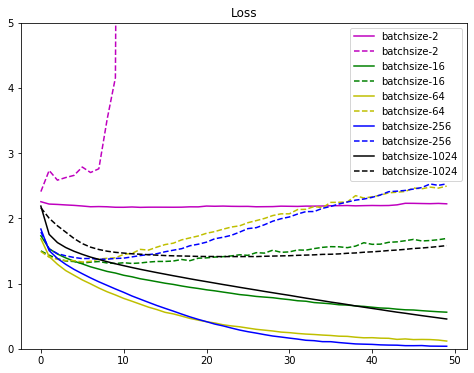

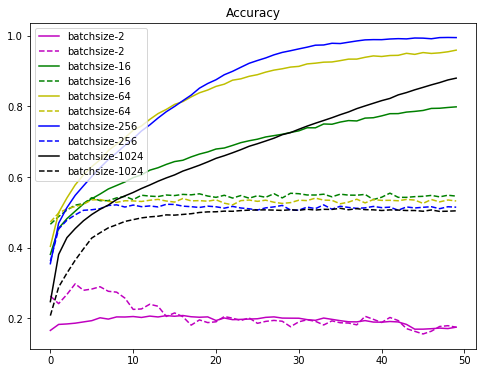

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["m","g", "y", "b","k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()